In [ ]:
#Problem Statement:
#Since the given data set is iris,
#the problem is to classify iris flowers into three species (setosa, versicolor, and virginica) based on four features: sepal length, sepal width, petal length, and petal width.
#we aim to develop a KNN algorithm that can accurately classify iris flowers into their respective species, and to analyze its performance and decision boundaries.(since KNN is often used for datasets with irregular decision
#boundaries)

In [ ]:
#Objectives
#Develop and train a KNN model to classify iris flower species.
#Compare the performance of the KNN model with an SVM model.
#Evaluate the models using relevant performance metrics.

In [ ]:
#Expected outcome
#A trained KNN model capable of accurately classifying iris flowers into their species.
#A trained SVM model for comparison.
#Performance metrics (accuracy, precision, recall, F1 score) for both models.

In [ ]:
#Dataset Description
#Dataset: Iris dataset
#Source: UCI Machine Learning Repository
#Summary:
#Number of Features: 4 (sepal length, sepal width, petal length, petal width)
#Number of Samples: 150
#Classes: 3 (setosa, versicolor, virginica)
#Data Type: Continuous
#Usage: Widely used for pattern recognition and machine learning algorithm testing due to its simplicity and clarity.

In [ ]:
#HYPERPARAMETRS CHOICE(KNN)
#Number of Neighbors:n_neighbors set to 10 ,determines how many of the nearest neighbors will be considered when making a prediction
#Distance between points:Euclidean,Specifies the distance metric used in the KNN algorithm


Dataset Description:
Number of Features in the dataset: 4
Number of Samples in the dataset: 150
Number of Classes in the dataset: 3
First 10 Rows of the Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1          

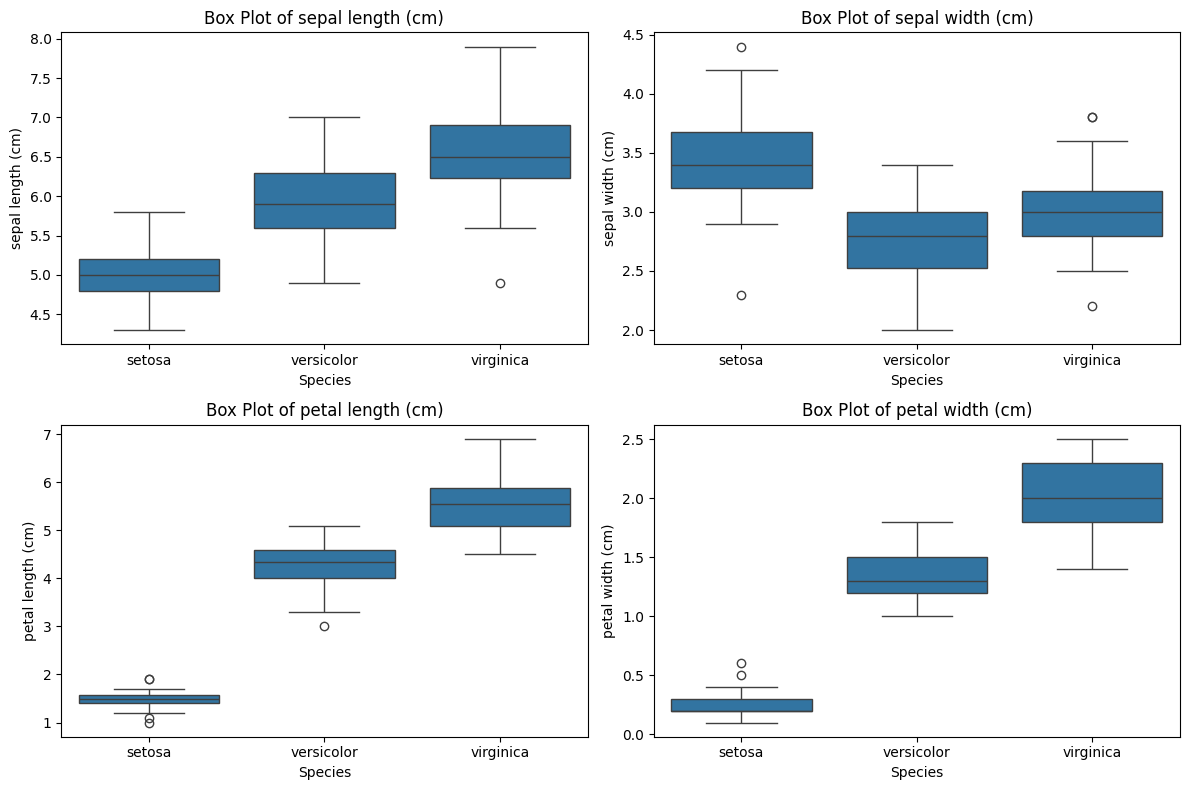

Number of outliers removed: 1
Training set shape after outliers removal (x_train, y_train): (119, 4) (119,)
Testing set shape after outliers removal (x_test, y_test): (30, 4) (30,)
Cross-Validation Scores: [0.95833333 1.         1.         0.95833333 1.        ]
Accuracy of KNN model: 0.93
Precision of KNN model: 0.94
Recall of KNN model: 0.93
F1 Score of KNN model: 0.93
Cross-Validation Scores of SVM: [0.91666667 1.         0.95833333 0.95833333 1.        ]
Accuracy of the SVM: 0.90
Precision of the SVM: 0.92
Recall of the SVM: 0.90
F1 Score of the SVM: 0.89


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from scipy import stats
from sklearn.model_selection import cross_val_score

# Load the Iris dataset
iris = load_iris()#to access data to the program/model
x=iris.data
y=iris.target
# Convert the dataset into a DataFrame for better readability
Iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
Iris_df['Species']=iris.target_names[iris.target]


# Print dataset description
print("Dataset Description:")
print("Number of Features in the dataset: " + str(len(iris.feature_names)))
print("Number of Samples in the dataset: " + str(len(iris.data)))
print("Number of Classes in the dataset: " + str(len(set(iris.target))))

# Display the first few rows of the dataset
print("First 10 Rows of the Dataset:")
print(Iris_df.head(10))
#(.head)shows the first 5 rows by defualt,but if you put an argument for example 9, it will show the first 9 rows

# Check for missing values
print("Missing Values:")
print(Iris_df.isnull().sum())# (.isnull)function that checks if there is 'nulls' or not , (.sum)function that counts 'nulls'

# Handle missing values - using mean
imputerUSINGMEAN = SimpleImputer(strategy='mean') # simpleImputer fills in missing values with the mean of the column
Iris_df.iloc[:, :-1] = imputerUSINGMEAN.fit_transform(Iris_df.iloc[:, :-1])#apply imputer to all columns except the last(Species) which is the "target"

# Normalize the features
scalerN = StandardScaler().fit(X)#standardize numerical features to ensure they are on a similar scale, scalling it to unit variance
X_standardized = scalerN.transform(X)#transform Xtrain to standerdizedX
print("X train before Normalization", x[0:5])
print("\nX train after Normalization" , X_standardized[0:5])

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_standardized, y, test_size=0.2,shuffle=True,random_state=0)
# Print the shapes of the training and testing sets
print("Training set shape (X_train, y_train):", X_train.shape, Y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, Y_test.shape)

#OUTLIERS DETECTION(VISUAL)

#Data visualisation as box Plot
plt.figure(figsize=(12, 8))
for feature in iris.feature_names:
    plt.subplot(2, 2, iris.feature_names.index(feature) + 1)
    sns.boxplot(x='Species', y=feature, data=iris_df)
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()
#OUTLIERS DETECTION(STATISTICAL)
# Calculate Z-scores for numerical features
z_scores = stats.zscore(X_standardized)
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).any(axis=1)

#remove the outliers from the dataset
x_clean = X_standardized[~outliers]
y_clean = y[~outliers]
print("Number of outliers removed:", np.sum(outliers))

# Split the data into training and testing sets again after removing outliers
X_train, X_test, y_train, y_test = train_test_split(x_clean, y_clean, test_size=0.2,shuffle=True,random_state=0)

# Print the shapes of the training and testing sets
print("Training set shape after outliers removal (x_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape after outliers removal (x_test, y_test):", X_test.shape, y_test.shape)
#kNN(k-Nearest Neighboor)
#if most of k closest samples(nearest neighbors) of a sample in the feature space belong to a category, the sample also belongs to this category.
#KNN is used for classification,and accurate classification helps researchers in studying and identifying plant species, which is essential for ecological research, conservation, and education.

#implementation with the Sklearn library

knnALGO = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
#CROSS VALIDATION for KNN
cv_scores_knn = cross_val_score(knnALGO, X_train, y_train, cv=5, scoring='accuracy')
# Print the results
print(f"Cross-Validation Scores: {cv_scores_knn}")
# Train KNN model
knnALGO.fit(X_train, y_train)
# Predict using KNN
y_pred_knn = knnALGO.predict(X_test)

# KNN Model Evaluation
KNN_accuracy = accuracy_score(y_test, y_pred_knn)
KNN_precision = precision_score(y_test, y_pred_knn, average='weighted')
KNN_recall = recall_score(y_test, y_pred_knn, average='weighted')
KNN_f1 = f1_score(y_test, y_pred_knn, average='weighted')

print(f"Accuracy of KNN model: {KNN_accuracy:.2f}")
print(f"Precision of KNN model: {KNN_precision:.2f}")
print(f"Recall of KNN model: {KNN_recall:.2f}")
print(f"F1 Score of KNN model: {KNN_f1:.2f}")

#Import svm model
from sklearn import svm
from sklearn.svm import SVC

#Create a svm Classifier
svm_model = SVC(C=1.0, kernel='linear', random_state=0)#linear karnel,regularization parameter

#  cross-validation
svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
# Print the results
print(f"Cross-Validation Scores of SVM: {svm_cv_scores}")
#Train the model using the training sets
svm_model.fit(X_train, y_train)

#Predict the response for test dataset
y_predSVM= svm_model.predict(X_test)

#SVM-MODEL EVALUATION


accuracy_SVM= accuracy_score(y_test, y_predSVM)
precision_SVM = precision_score(y_test, y_predSVM, average='weighted')
recall_SVM= recall_score(y_test, y_predSVM, average='weighted')
f1_SVM= f1_score(y_test,y_predSVM, average='weighted')

# Print the results
print(f"Accuracy of the SVM: {accuracy_SVM:.2f}")
print(f"Precision of the SVM: {precision_SVM:.2f}")
print(f"Recall of the SVM: {recall_SVM:.2f}")
print(f"F1 Score of the SVM: {f1_SVM:.2f}")

In [ ]:
#SVM(Support vector machines)
# binary classification models. Their basic model is the linear classifier
#that maximizes the width of the gap between the two categories in the feature space. SVMs also have a
#kernel trick, which makes it a non-linear classifier.

#SVM iteratively optimize the hyperplane and supports vectors to maxmize the margin thereby finding the most generailizable
#decision boundries(iris has irregular decision boundries)



In [ ]:
#HYPERPARAMETRS CHOICE(SVM)
#Kernel: The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF).
#we used the linear kernel initially. The Iris dataset is small and simple enough that a linear kernel may work well.
#Regularization:used to maintain regularization, it is set on 1, a smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.